In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("pj2-project").getOrCreate()

# https://sparkbyexamples.com/apache-hive/pyspark-save-dataframe-to-hive-table/
SparkSession.builder.enableHiveSupport()

In [2]:
import pyspark.sql.functions  as F

In [7]:
df_business = spark.read.table("yelp.business")
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [9]:
# pdf_business = df_business.toPandas()

In [5]:
df_business.summary().show()

+-------+-----------------+--------------------+--------------------+-----------+-------------------+-----------------+------------------+--------------------+------------------+-----------------+------------------+------+
|summary|          address|         business_id|          categories|       city|            is_open|         latitude|         longitude|                name|       postal_code|     review_count|             stars| state|
+-------+-----------------+--------------------+--------------------+-----------+-------------------+-----------------+------------------+--------------------+------------------+-----------------+------------------+------+
|  count|           117618|              117618|              117618|     117618|             117618|           117618|            117618|              117618|            117618|           117618|            117618|117618|
|   mean|7369.333333333333|                null|                null|       null|   0.80749545137649|36.6123

In [13]:
df_business.summary().toPandas()

,summary,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,count,117618,117618,117618,117618,117618,117618,117618,117618,117618,117618,117618,117618
1,mean,7369.333333333333,None,None,None,0.80749545137649,36.61230752280316,-89.27767905452407,1252.4,45168.511811509285,52.95823768470812,3.659320852250506,None
2,stddev,8738.777641447725,None,None,None,0.39426877763284607,5.838799887914959,14.804658149735742,811.1275005954502,26259.90389318734,135.1266935135057,0.9321712024339991,None
3,min,,---kPU91CF4Lq2-WlRu9Lw,"3D Printing, Local Services, Hobby Shops, Shop...",AB Edmonton,0,27.555127,-120.095137,Grow Academy,,5,1.0,AB
4,25%,850.0,None,None,None,1,32.1729659,-90.3498869,360.0,19355.0,9,3.0,None
5,50%,3070.0,None,None,None,1,38.7309883,-86.1202438722,1500.0,37064.0,18,4.0,None
6,75%,11964.0,None,None,None,1,39.95349,-75.4502903,1899.0,70002.0,46,4.5,None
7,max,​185 E State St,zzyx5x0Z7xXWWvWnZFuxlQ,"Zoos, Tours, Arts & Entertainment, Hotels & Tr...",​Largo,1,53.6518378,-73.2004570502,​Silent Stay Meditation & Retreat Center,T9E 0V3,7568,5.0,WA


In [40]:
df_business.groupBy('city').count().sort(F.col('count').desc()).show()

+----------------+-----+
|            city|count|
+----------------+-----+
|    Philadelphia|11070|
|          Tucson| 7268|
|           Tampa| 7264|
|    Indianapolis| 5878|
|       Nashville| 5529|
|     New Orleans| 4734|
|            Reno| 4469|
|        Edmonton| 3710|
|     Saint Louis| 3687|
|   Santa Barbara| 2913|
|           Boise| 2338|
|      Clearwater| 1756|
|        Metairie| 1331|
|Saint Petersburg| 1277|
|          Sparks| 1272|
|        Franklin| 1138|
|      Wilmington| 1113|
|       St. Louis| 1110|
|  St. Petersburg|  942|
|        Meridian|  849|
+----------------+-----+
only showing top 20 rows



In [8]:
philadelphiabusiness = df_business.filter('city == "Philadelphia"')

In [9]:
philrest = philadelphiabusiness.filter((F.col('categories').contains("Restaurants")))

In [10]:
philrest.show(10,False)

+--------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+--------------------------------------------------------------------------------------------------+------------+

## Keep relevant columns
* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [44]:
keepcol = ['business_id','name','categories','stars']
philrest = philrest[keepcol]

In [46]:
philrest.show()

+--------------------+--------------------+--------------------+-----+
|         business_id|                name|          categories|stars|
+--------------------+--------------------+--------------------+-----+
|BnffoBFNuGmNAksel...|Cavanaugh's Resta...|Burgers, Caterers...|  3.0|
|bbWRELNpKXXnFgQMk...| Trolley Car Station|Restaurants, Amer...|  3.0|
|n3sRn8jx0zT5ew4tj...|Spring Garden Res...|Breakfast & Brunc...|  4.0|
|FfrMJk5L3weVgVGhp...|Rustika Pollo a L...|Restaurants, Chic...|  3.5|
|TC0SkzAqSdbmX0bYy...|          McDonald's|Fast Food, Restau...|  1.5|
|dgm6jrUZj-vAWa1OU...|           Yiro Yiro|Greek, Food, Medi...|  4.5|
|yj0SWZvJ0tGwAywoV...|                 Dig|Restaurants, Amer...|  4.5|
|wXKiStXyJo0zI4uCw...|       Tony's Market|Food, Sandwiches,...|  4.5|
|T9C1od-JorSPXwXgz...| David's Mai Lai Wah|Seafood, Chicken ...|  3.0|
|fFbRLJVbT8DnEbm9s...|         Tradesman's|Barbeque, Nightli...|  3.0|
|iCVrRHR_Yxr6mHCpO...|           AmeriThai|   Thai, Restaurants|  4.0|
|G1PbN

## Join review data
We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained.

* Prepare dataframes to be joined --- on business_id

In [47]:
df_review = spark.read.table("yelp.review")

In [48]:
df_philrestfinal = philrest.join(df_review, ['business_id'],'inner')

In [51]:
df_philrestfinal.summary().toPandas()

,summary,business_id,name,categories,stars,cool,date,funny,review_id,stars,text,useful,user_id
0,count,662473,662473,662473,662473,662473,662473,662473,662473,662473,662473,662473,662473
1,mean,None,559.7400881057268,None,3.818016734266906,0.5485431104361989,None,0.3667364556744199,None,3.826383867719892,None,1.096148824178495,None
2,stddev,None,574.6348192632663,None,0.5628930006239539,1.8567562332183867,None,1.4265071503997055,None,1.3000416190490802,None,2.538471425933532,None
3,min,-0M0b-XhtFagyLmsBtOe8w,&pizza - UPenn,"Active Life, Beer Gardens, Grocery, Middle Eas...",1.0,0,2005-02-16 04:06:26,0,---aZVSWnQtOP_12QzIt8g,1.0,! Came by with friends after they ran the Broa...,0,---r61b7EpVPkb4UVme5tA
4,25%,None,24.0,None,3.5,0,None,0,None,3.0,None,0,None
5,50%,None,24.0,None,4.0,0,None,0,None,4.0,None,0,None
6,75%,None,943.0,None,4.0,1,None,0,None,5.0,None,1,None
7,max,zzyx5x0Z7xXWWvWnZFuxlQ,¡Juice!,"Wraps, Sandwiches, Restaurants, Delis, Breakfa...",5.0,163,2022-01-19 19:46:34,227,zzzsujjXnH7MNLW2XYVf1A,5.0,＼(^o^)／\nThey have a different taste than most...,224,zzzMBVS73g3ZJ7qL8JyhiA


In [52]:
df_philrestfinal.select('datetime').show()

+-------------------+
|           datetime|
+-------------------+
|2013-01-24 14:36:59|
|2014-01-03 01:54:16|
|2021-05-15 01:07:10|
|2020-02-18 05:54:00|
|2020-10-25 11:54:03|
|2021-05-21 01:05:45|
|2021-09-06 05:16:08|
|2021-06-13 23:18:56|
|2019-04-20 19:19:53|
|2020-10-09 14:55:30|
|2021-01-31 20:25:02|
|2021-07-02 02:41:01|
|2019-04-16 13:40:10|
|2021-07-13 18:10:27|
|2016-03-28 20:45:52|
|2021-10-20 23:08:38|
|2021-08-02 17:38:07|
|2021-03-01 14:50:46|
|2021-04-23 17:21:10|
|2021-01-12 00:02:52|
+-------------------+
only showing top 20 rows



In [62]:
# cast date to datetime
df_philrestfinal = df_philrestfinal.withColumn("datetime",F.to_timestamp(F.col('date'),'yyyy-MM-dd HH:mm:ss'))
df_philrestfinal = df_philrestfinal.filter(F.col('datetime') > "2020-01-01")

In [66]:
df_philrestfinal.show(2,True)

+--------------------+--------------------+--------------------+-----+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+-------------------+
|         business_id|                name|          categories|stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|           datetime|
+--------------------+--------------------+--------------------+-----+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+-------------------+
|p-MSh95si_sDdih94...|           Forsythia|Restaurants, Fren...|  4.5|   0|2021-05-15 01:07:10|    0|WK4syNkN0puOr6Yju...|  5.0|Beautiful place t...|     0|oN2GmKS7jRjunWGNk...|2021-05-15 01:07:10|
|pDUcsN79bDwhOMBaD...|Cafe Pho Ga Thanh...|Food, Asian Fusio...|  4.0|   0|2020-02-18 05:54:00|    0|6kwktNYRib2oWHNHa...|  3.0|The place is supe...|     0|u5ueF05YmDkxQ-Yb9...|2020-02-18 05:54:00|
+---------

In [64]:
import matplotlib.pyplot as plt

In [70]:
pdf_philrestfinal = df_philrestfinal.toPandas()

<AxesSubplot:title={'center':'Philadelphia Top 10 Business Entities with most comments from 2020.01.01 till now'}, xlabel='name'>

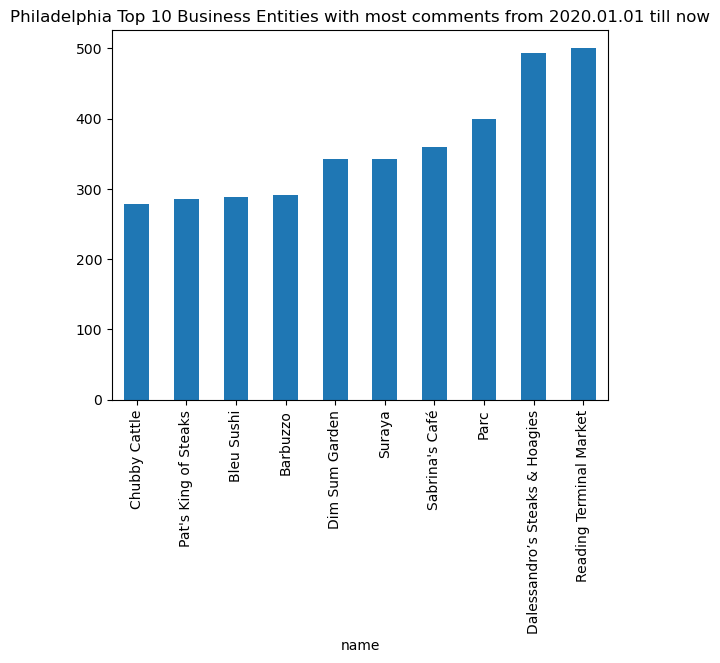

In [72]:
# e.g. calculate counts of reviews per business entity, and plot it
# group by business entity name, count and sort
review_counts_by_business_entity_phil = pdf_philrestfinal.groupby('name').size().sort_values()

# filter the top 10 business with the most reviews
review_counts_by_business_entity_top_10_names_phil = review_counts_by_business_entity_phil[-10:].index

# we try to plot the review received by the top 10 business entities from 2020.01.01 till now
review_counts_top_10_phil = pdf_philrestfinal[pdf_philrestfinal['name'].isin(review_counts_by_business_entity_top_10_names_phil)]
review_counts_top_10_phil = review_counts_top_10_phil.groupby('name').size().sort_values()
review_counts_top_10_phil.plot.bar(title='Philadelphia Top 10 Business Entities with most comments from 2020.01.01 till now')

In [ ]:
spark ML 